## Example of Nirdust application
The example imputs are two Flamingos-2 (Gemini South) $K_{long}$ band longslit spectra of NGC 5128 (Centaurus A) a Seyfert 2 galaxy.

The spectra correspond to:

1) A nuclear spectrum extracted in an aperture of 1"x 1" (slit width = 1").

2) An off-nuclear spectrum extracted at 3.34" distance from the nucleus and in an aperture of 1.08" x 1".

These spectra can be found in the examples folder of the Git-Hub repository for Nirdust.
No flux-calibration has been performed over these spectra.


For this simple aplication example we only need to import nirdust, and matplotlib to see the spectra at diferent steps:

In [1]:
import nirdust as nd
import matplotlib.pyplot as plt

### Read the spectra from the FITS files and store them in two separate NirdustSpectrum objects
Note that the redshift for this galaxy is 0.00183 (source: NED)

In [2]:
target_spectrum = nd.read_fits("nuclear_spectrum.fits", z=0.00183)
reference_spectrum = nd.read_fits("external_spectrum.fits", z=0.00183)

target_spectrum

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


NirdustSpectrum(z=0.00183, spectral_length=1751, spectral_range=[18889.58-25106.71] Angstrom)

The spectra before any pre-processing procedure look like this:

(-10.0, 4000.0)

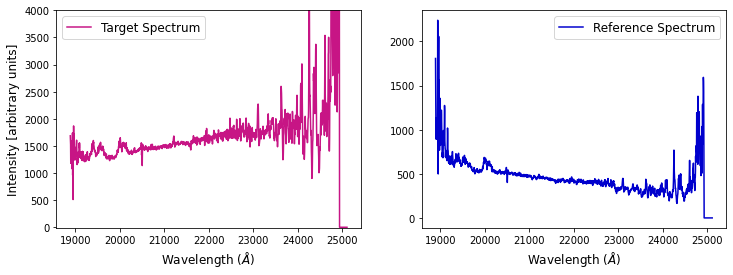

In [3]:
fig, axs = plt.subplots(1, 2,figsize=(12, 4))
axs[0].plot(target_spectrum.spectral_axis, target_spectrum.flux, color="mediumvioletred", label="Target Spectrum")
axs[1].plot(reference_spectrum.spectral_axis, reference_spectrum.flux, color="mediumblue", label="Reference Spectrum")
axs[0].legend(loc=2, fontsize=12)
axs[1].legend(loc=1, fontsize=12)
axs[0].set_xlabel("Wavelength ($\AA$)", fontsize=12 )
axs[1].set_xlabel("Wavelength ($\AA$)", fontsize=12)
axs[0].set_ylabel("Intensity [arbitrary units]", fontsize=12)
axs[0].set_ylim(-10, 4000)  #setting ylim for better display, the noise rises higher than the limit at the end of spectra


### Cut the borders of the spectrum where the noise is too high

K-band spectra must be cut taking into account two factors:
In one hand, spectrum quality often drops in the borders of the spectral range due to detector response and atmospheric transmission. Special attention must be payed to bad telluric absorption correction, which commonly affects the beginning of the K band between $\sim$ 1.95 and 2.1 $\mu$m. In the other hand, in $K_{long}$ spectra, the beginning of the CO absorption band causes significant continuum absorption between 2.3 and 2.5 $\mu$m and hence the information of the dust presence is lost. Aditionally, in the case of this set of spectra, high levels of noise are present in the spectra beyond 2.4 $\mu$m.

In [4]:
start, end = 20600, 22700  # wavelengths in A
cut_target = target_spectrum.cut_edges(start, end)
cut_reference = reference_spectrum.cut_edges(start, end)

Once the spectra are cut the obtained result is:


Text(0, 0.5, 'Intensity [arbitrary units]')

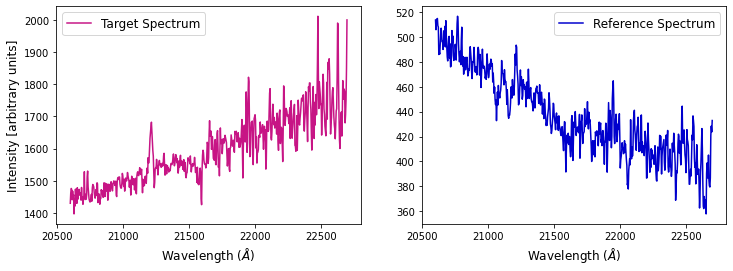

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(cut_target.spectral_axis, cut_target.flux, color="mediumvioletred", label="Target Spectrum")
axs[1].plot(cut_reference.spectral_axis, cut_reference.flux, color="mediumblue", label="Reference Spectrum")
axs[0].legend(loc=2, fontsize=12)
axs[1].legend(loc=1, fontsize=12)
axs[0].set_xlabel("Wavelength ($\AA$)", fontsize=12) 
axs[1].set_xlabel("Wavelength ($\AA$)", fontsize=12)
axs[0].set_ylabel("Intensity [arbitrary units]", fontsize=12)

### Remove spectral features

The Reference Spectrum is quite featurless although is quite noisy, but the Target Spectrum presents some emission or noise features that could be auctomatically detected and removed.
'line_spectrum' will detect the features down to some certain 'noise_factor' and provide the mask and the spectrum of the detected lines:

In [6]:
target_lines, target_line_intervals = nd.line_spectrum(cut_target, noise_factor=5.5)
reference_lines, reference_line_intervals = nd.line_spectrum(cut_reference, noise_factor=3.5)

The spectrum of the detected features in each case is a NirdustSpectrum object and can be plotted for inspection:

Text(0, 0.5, 'Intensity [arbitrary units]')

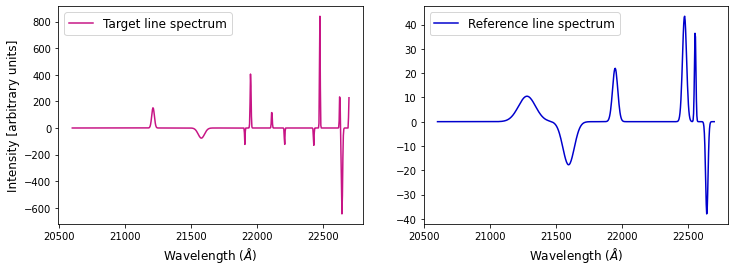

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(target_lines.spectral_axis, target_lines.flux, color="mediumvioletred", label="Target line spectrum")
axs[1].plot(reference_lines.spectral_axis, reference_lines.flux, color="mediumblue", label="Reference line spectrum")
axs[0].legend(loc=2, fontsize=12)
axs[1].legend(loc=2, fontsize=12)
axs[0].set_xlabel("Wavelength ($\AA$)", fontsize=12 )
axs[1].set_xlabel("Wavelength ($\AA$)", fontsize=12)
axs[0].set_ylabel("Intensity [arbitrary units]", fontsize=12)


The mask for each spectrum is stored in the second output of line_spectrum and can be used as input for the class method "mask_spectrum":

In [8]:
masked_target = cut_target.mask_spectrum(line_intervals=target_line_intervals)
masked_reference = cut_reference.mask_spectrum(line_intervals=reference_line_intervals)

Text(0, 0.5, 'Intensity [arbitrary units]')

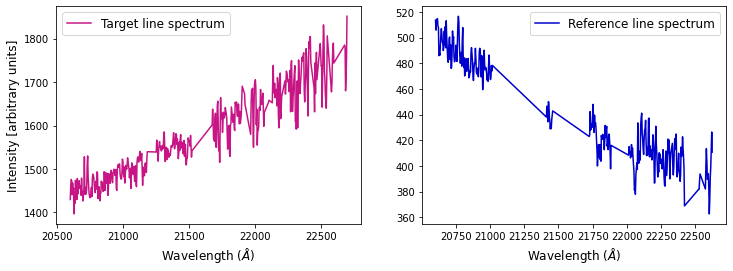

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(masked_target.spectral_axis, masked_target.flux, color="mediumvioletred", label="Target line spectrum")
axs[1].plot(masked_reference.spectral_axis, masked_reference.flux, color="mediumblue", label="Reference line spectrum")
axs[0].legend(loc=2, fontsize=12)
axs[1].legend(loc=1, fontsize=12)
axs[0].set_xlabel("Wavelength ($\AA$)", fontsize=12)
axs[1].set_xlabel("Wavelength ($\AA$)", fontsize=12)
axs[0].set_ylabel("Intensity [arbitrary units]", fontsize=12)

The last step in the pre-processing of the spectra is to match the spectral axes of both spectra to match the spectral resultution (not necessary in this example) and to homogenize the masked points:

In [10]:
final_target, final_reference = nd.match_spectral_axes(masked_target, masked_reference)

The final spectra result:

Text(0, 0.5, 'Intensity [arbitrary units]')

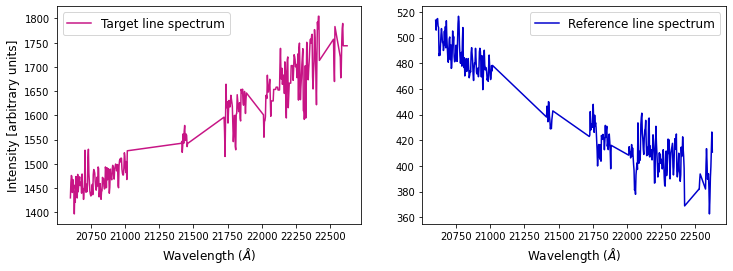

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(final_target.spectral_axis, final_target.flux, color="mediumvioletred", label="Target line spectrum")
axs[1].plot(final_reference.spectral_axis, final_reference.flux, color="mediumblue", label="Reference line spectrum")
axs[0].legend(loc=2, fontsize=12)
axs[1].legend(loc=1, fontsize=12)
axs[0].set_xlabel("Wavelength ($\AA$)", fontsize=12)
axs[1].set_xlabel("Wavelength ($\AA$)", fontsize=12)
axs[0].set_ylabel("Intensity [arbitrary units]", fontsize=12)

### Compute the S/N ratio in order to asset the uncertainties of the result

After the spectral emission and noise features are removed, the noise can be computed in order to calculate the S/N ratio of each spectrum. Note thet the class method "compute_noise" will return a new NirdustSpectrum instance:

In [12]:
low_lim, upper_lim = 20700, 22400  # wavelengths in A
noise_target = masked_target.compute_noise(low_lim, upper_lim)
noise_reference = masked_reference.compute_noise(low_lim, upper_lim)
noise_target.noise, noise_reference.noise

(30.812629918132114, 10.996114393173345)

To compute the mean S/N of each spectra the value of the signal in the center of the band can be assumed as the mean signal. This step is not part of the pre-processing of the spectra but is helpful in order to asset the uncertainty of the fitting (see the publication of the package).

In [13]:
central_index = masked_target.spectral_length // 2

target_signal = masked_target.flux[central_index]
reference_signal = masked_reference.flux[central_index]

snr_target = target_signal/noise_target.noise
snr_reference = reference_signal/noise_reference.noise

snr_target.value, snr_reference.value

(50.10917956601182, 37.422864914091654)

### Obtain the temperature of the hot dust

Now the spectra are ready to perform the fitting and obtain the temperature. The 'bounds' parameter of 'fit_blackbody' can be determined in order to provide some physical meaningful constraints to the parameter fitting. Also, the 'gamma_target_fraction' parameter can be constrained to a low value if the spectra are background_substracted:

In [14]:
# min and max bounds for T, alpha, beta, gamma
bounds = ((400, 2000), (0, 20), (6, 20), (-10, 10))

results = nd.fit_blackbody(final_target, final_reference, niter=700, gamma_target_fraction=0.01,bounds=bounds)

/home/martin/Documents/Projects/nirdust/lib/python3.8/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


The resutl of the fitting is a NirdustResults object and can be displayed as a dictionary that contains many useful information as the values for the fitted parameters and the success status. The fitted values for the $\alpha, \beta$, and  $\gamma$ parameters should not be in the borders of the intervals defined for the parameters in 'bounds', in that case, the fitting must be repeated with differents initial parameters.

In [15]:
results

NirdustResults(temperature=666 K, alpha=1.79, beta=11.63, gamma=1.15,
minimizer_results=                        fun: 1728.147825028615
 lowest_optimization_result:      fun: 1728.147825028615
     jac: array([  -3.2599333 ,  124.4421125 , -503.72867213,   -5.27996959])
 message: 'Optimization terminated successfully'
    nfev: 773
     nit: 79
    njev: 78
  status: 0
 success: True
       x: array([666.49754838,   1.78847343,  11.6318601 ,   1.14510016])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 312
                       nfev: 274345
                        nit: 700
                       njev: 23641
                    success: True
                          x: array([666.49754838,   1.78847343,  11.6318601 ,   1.14510016]))

Also, the NirudtsResults class has a class method to plot the data and the spectra obtained with the fitting:

(<AxesSubplot:ylabel='Intensity [arbitrary units]'>,
 <AxesSubplot:xlabel='Wavelength [$\\AA$]', ylabel='Residual'>)

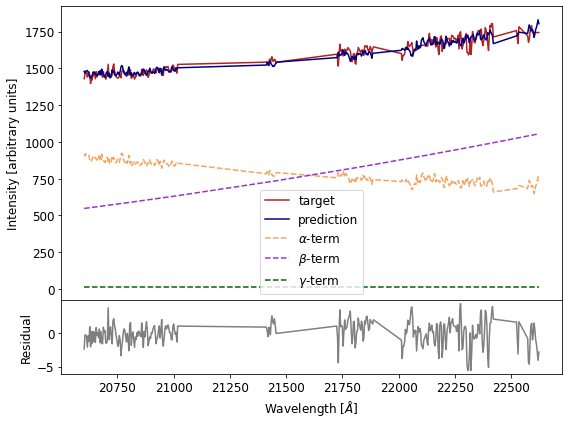

In [16]:
results.plot(show_components=True)